# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +27.22443316679                   -1.43    5.39s
  2   +18.19363115916        0.96       -0.90   13.9ms
  3   +12.10728291424        0.78       -0.50   13.8ms
  4   +11.66356578268       -0.35       -0.44   11.2ms
  5   +10.61037526823        0.02       -0.60   11.3ms
  6   +9.653547341948       -0.02       -0.73   11.2ms
  7   +8.863060632178       -0.10       -0.76   11.2ms
  8   +8.380739757720       -0.32       -0.77   11.1ms
  9   +8.208172030897       -0.76       -0.87   11.4ms
 10   +8.151536686140       -1.25       -0.96   11.2ms
 11   +8.131791497135       -1.70       -1.22   8.68ms
 12   +8.097195186602       -1.46       -1.35   8.57ms
 13   +8.054603495443       -1.37       -1.33   8.52ms
 14   +8.007311544976       -1.33       -1.17   8.59ms
 15   +7.944812143524       -1.20       -1.02   8.52ms
 16   +7.929996720026       -1.83       -0.80   52.6ms
 17   +7.92

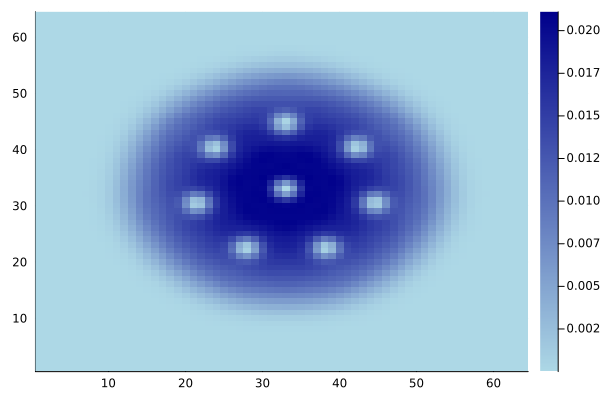

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)